In [142]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('water_potability.csv')

## EDA

In [96]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [97]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [98]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [100]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [101]:
df["Potability"].value_counts() * 100 / len(df)

0    60.989011
1    39.010989
Name: Potability, dtype: float64

In [102]:
df.corr() 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<AxesSubplot:>

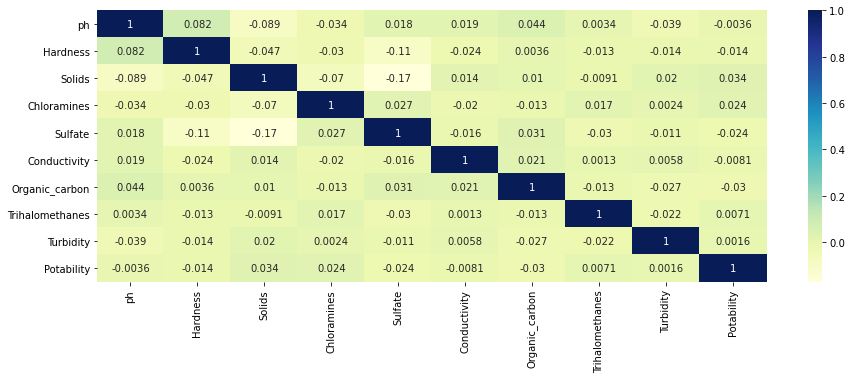

In [103]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

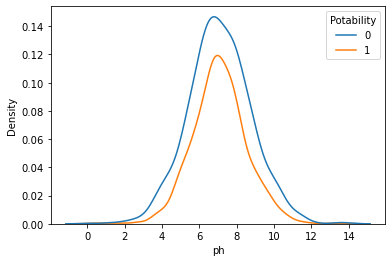

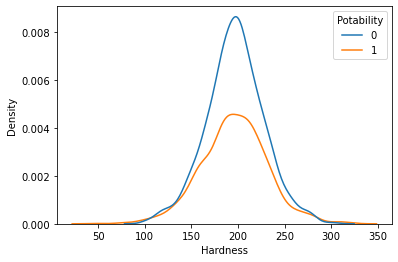

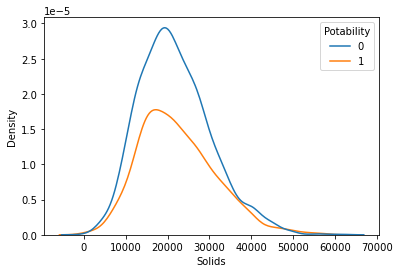

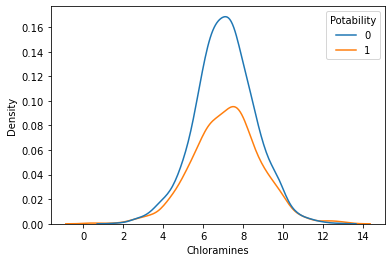

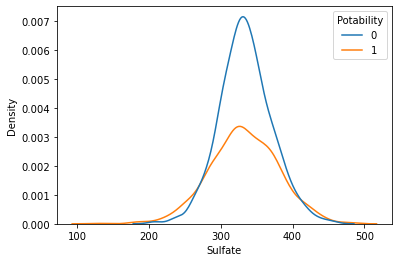

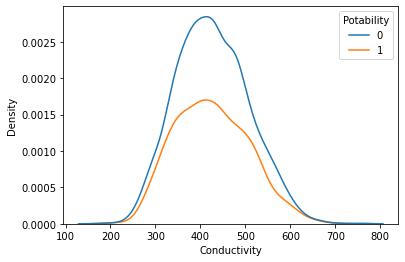

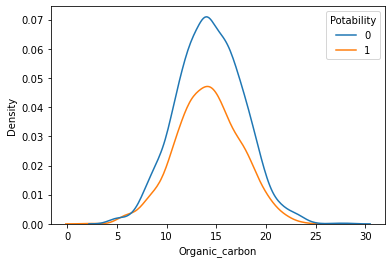

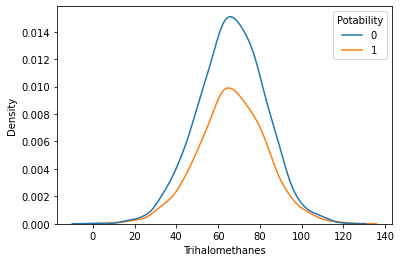

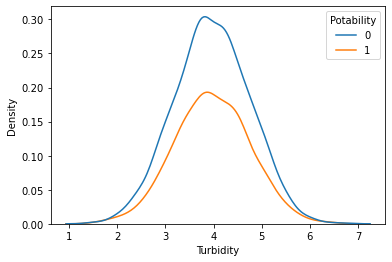

In [104]:
for i in df.columns[:-1]:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue = "Potability")

## Preprocessing

In [105]:
df2 = df.dropna(subset = ['Trihalomethanes'])

In [106]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [107]:
missing_values = ['ph', 'Sulfate']

for i in missing_values:
    meanVal = df2[i].mean()
    df2.fillna(value = meanVal, inplace = True)

In [108]:
df2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [112]:
df_normalize = df2.copy()

In [115]:
for i in df_normalize.columns[:-1]:
    df_normalize[i] = MinMaxScaler().fit_transform(np.array(df_normalize[i]).reshape(-1, 1))

In [116]:
df_normalize

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505725,0.526368,0.336096,0.543891,0.762603,0.669439,0.313402,0.699753,0.286091,0
1,0.265434,0.224053,0.300611,0.491839,0.000000,0.719411,0.497319,0.450999,0.576793,0
2,0.578509,0.603866,0.321619,0.698543,0.000000,0.414652,0.562017,0.532866,0.303637,0
3,0.594055,0.564356,0.356244,0.603314,0.738064,0.317880,0.622089,0.808065,0.601015,0
4,0.649445,0.431072,0.289922,0.484900,0.639425,0.379337,0.358555,0.253606,0.496327,0
...,...,...,...,...,...,...,...,...,...,...
3270,0.433544,0.453335,0.423895,0.578908,0.714463,0.409897,0.378070,0.484188,0.419685,1
3271,0.333436,0.481467,0.775947,0.533436,0.744526,0.603192,0.448062,0.535037,0.564534,1
3273,0.672822,0.409685,0.539101,0.547807,0.000000,0.438152,0.338662,0.560655,0.349570,1
3274,0.366197,0.629373,0.191490,0.465860,0.000000,0.387157,0.343638,0.622659,0.616120,1


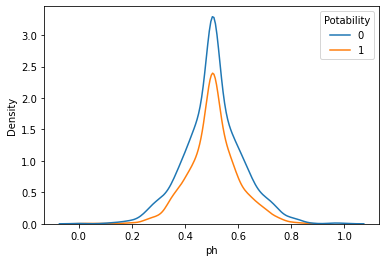

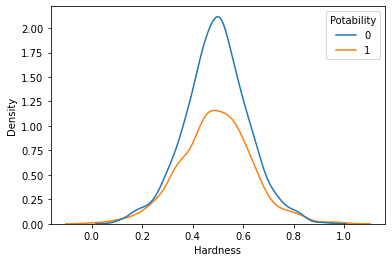

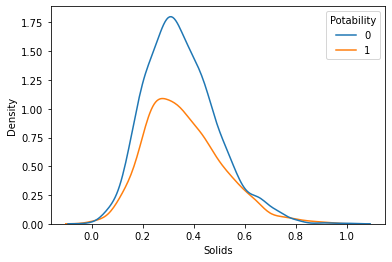

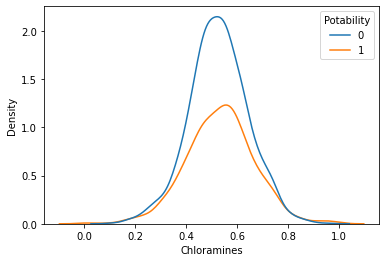

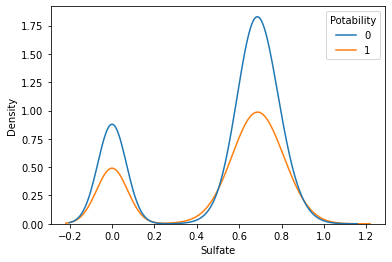

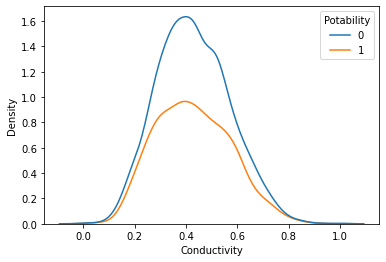

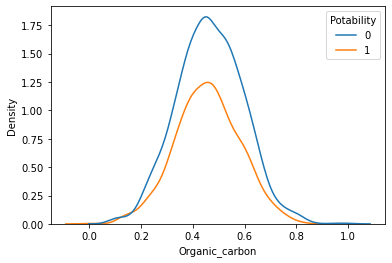

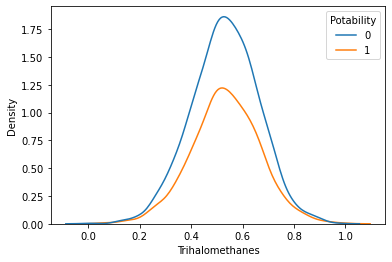

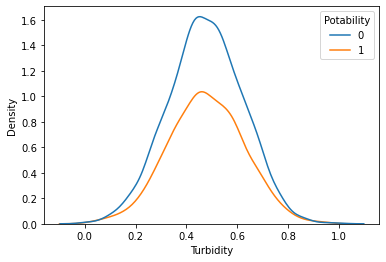

In [117]:
for i in df_normalize.columns[:-1]:
    plt.figure()
    sns.kdeplot(data=df_normalize, x=i, hue = "Potability")

## ML Modulation

In [134]:
X = df_normalize.drop('Potability', axis = "columns")
y = df_normalize[['Potability']]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3)

In [135]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [128]:
predictions = model.predict(X_test)

In [130]:
accuracy_score(y_test, predictions)

0.6609625668449198

In [132]:
confusion_matrix(y_test, predictions)

array([[503,  65],
       [252, 115]], dtype=int64)

In [138]:
cross_val_score(model, X, y, cv = 5)

array([0.60192616, 0.61155698, 0.63723917, 0.61155698, 0.65755627])

In [147]:
model2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)

model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test)

accuracy_score(y_test, predictions2)

0.611764705882353

## ML Explainability

In [139]:
import eli5
from eli5.sklearn import PermutationImportance

In [140]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0261 ± 0.0136,Sulfate
0.0227 ± 0.0133,ph
0.0195 ± 0.0193,Chloramines
0.0101 ± 0.0144,Solids
0.0039 ± 0.0129,Hardness
0.0036 ± 0.0105,Turbidity
-0.0058 ± 0.0220,Trihalomethanes
-0.0086 ± 0.0073,Organic_carbon
-0.0154 ± 0.0095,Conductivity


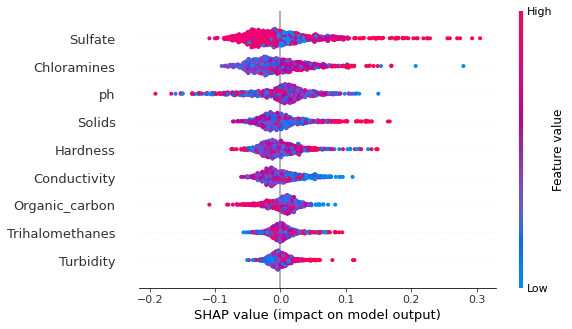

In [141]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)